In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from visdom import Visdom
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

%matplotlib inline

[Pytorch Document](http://pytorch.org/docs/master/optim.html)

In [30]:
# hyper parameters
input_size = 2
output_size = 2
num_epochs = 60
learning_rate = 0.001


In [31]:
# toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [32]:
x_train.shape

(15, 1)

In [33]:
y_train.shape

(15, 1)

In [22]:
# lenear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.linear2 = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear(x)
        return out

    

In [23]:
# super 는 다중상속 환경에서 빛을 발함

[super](https://docs.python.org/3/library/functions.html#super)

In [24]:
model = LinearRegression(input_size, output_size)

In [25]:
model

LinearRegression (
  (linear): Linear (2 -> 2)
  (linear2): Linear (2 -> 1)
  (sigmoid): Sigmoid ()
)

In [16]:
for i in model.parameters():
    print(i)

Parameter containing:
 0.1058  0.0408
 0.3093  0.7037
[torch.FloatTensor of size 2x2]

Parameter containing:
 0.0542
 0.3221
[torch.FloatTensor of size 2]

Parameter containing:
-0.6821 -0.4828
[torch.FloatTensor of size 1x2]

Parameter containing:
1.00000e-02 *
  5.7143
[torch.FloatTensor of size 1]



In [26]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [27]:
for epoch in range(num_epochs):
    # convert numpy array to torch variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print('Epoch [{}.{}], Loss: {:.7f}'.format(epoch+1, num_epochs, loss.data[0]))

RuntimeError: size mismatch, m1: [15 x 1], m2: [2 x 2] at /Users/soumith/code/builder/wheel/pytorch-src/torch/lib/TH/generic/THTensorMath.c:1293

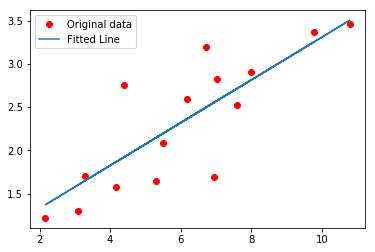

In [23]:
# plot the graph
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted Line')
plt.legend()
plt.show()

In [25]:
%%time
# save the model
torch.save(model.state_dict(), 'model.pkl')

CPU times: user 599 µs, sys: 788 µs, total: 1.39 ms
Wall time: 767 µs


# Other Linear Regression

In [31]:
vis = Visdom()

In [32]:
# make dataset
num_data = 1000

noise = init.normal(torch.FloatTensor(num_data, 1), std=0.2)
x = init.uniform(torch.Tensor(num_data, 1), -10, 10)
y = 2*x + 3
y_noise = 2*(x+noise)+3

In [33]:
x


 0.0025
-4.6338
 4.4948
   ⋮    
-5.7540
-2.9189
-8.1486
[torch.FloatTensor of size 1000x1]

In [34]:
y


  3.0050
 -6.2675
 11.9896
    ⋮    
 -8.5080
 -2.8379
-13.2971
[torch.FloatTensor of size 1000x1]

In [35]:
model = nn.Linear(1,1)

In [36]:
model

Linear (1 -> 1)

In [37]:
output = model(Variable(x))

In [39]:
loss_func = nn.L1Loss()

In [40]:
optimizer = optim.SGD(model.parameters(), lr=1)

In [41]:
# train
loss_arr = []
label = Variable(y_noise)
for i in range(1000):
    output = model(Variable(x))
    optimizer.zero_grad()
    
    loss = loss_func(output, label)
    loss.backward()
    optimizer.step()
    loss_arr.append(loss.data.numpy()[0])
    
param_list = list(model.parameters())
print(param_list[0].data, param_list[1].data)


-0.6497
[torch.FloatTensor of size 1x1]
 
 2.9504
[torch.FloatTensor of size 1]



optimizer.zero_grad : Clears the gradients of all optimized Variable s.